# Project

- The project is to create a notebook investigating the variables and
data points within the well-known iris flower data set associated
with Ronald A Fisher.
- In the notebook, you should discuss the classification of each
variable within the data set according to common variable types
and scales of measurement in mathematics, statistics, and Python.
- Select, demonstrate, and explain the most appropriate summary
statistics to describe each variable.
- Select, demonstrate, and explain the most appropriate plot(s) for
each variable.
- The notebook should follow a cohesive narrative about the data
set.

###### Source file: Iris – UCI Machine Learning Repository. Aug. 17, 2023. url: https://archive.ics.uci.edu/dataset/53/iris

## ATU -Fundamentals of Data Analysis, Winter 2023/24
##### Author: Norbert Antal

## **Investigating the Iris Dataset**

### **1. Introduction**

##### 1.1 Origins of the data
Fisher’s Iris data set, is a multivariate data set that was introduced by British statistician and biologist Ronald Fisher. <br>The data was collected by Edgar Anderson to quantify the morphologic variation of three related Iris flower species. Fisher utilised the data to demonstrate the use of linear discriminant analysis in his 1936 paper, published in the Annals of Eugenics; “The use of multiple measurements in taxonomic problems”.
<br>In recent times, the dataset is often used as a typical test case for statistical classification in machine learning.<br>


##### 1.2 Contents of the Iris dataset 
The Iris dataset contains 50 samples of three different Iris flower species: Iris setosa, Iris virginica, and Iris versicolor. Each sample has four features measured in centimetres: sepal length, sepal width, petal length and petal width. Using these four sets of data, Ronald Fisher developed a linear discriminant model to differentiate between the species.<br>

###### (ref Iris flower data: https://en.wikipedia.org/wiki/Iris_flower_data_set)

### **2. Preparation**

##### 2.1 Software used for this project

+ VS Code editor
+ Python version 3.9.13 with imported libraries:
  + *pandas* - for data manipulation and analysis 
  + *matplotlib.pyplot* - for creating graphical representation of data 
  + *seaborn* - also for graphical data representation with extended functionality and styling options
###### Pandas (ref: https://pandas.pydata.org/) <br> Matplotlib (ref: https://matplotlib.org/) <br>Seaborn (ref: https://seaborn.pydata.org/index.html)
  
##### 2.2 Data source:
Source files downloaded from the UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/iris) and saved in the '/data' folder to prevent issues if the file is altered or moved at the original source.<br> The source file 'iris.data' is in a comma-separated value format (csv) without headers, 'iris.names' is a brief description of the dataset which contains information regarding the headers for the data.

In [228]:
# load modules required for the notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 2.3 Reading and validating data
Files 'iris.data' and 'iris.names' were copied to the project folder for easy access.<br>
Data will be analysed using mainly Pandas which is a popular data analysis library in Python that provides user-friendly data structures and data analysis tools. The name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals. The Pandas project began in 2007 with Wes McKinney at AQR Capital while he was a researcher there from 2007 to 2010<br>

###### Pandas (ref: https://en.wikipedia.org/wiki/Pandas_(software))

The comma separated value file is converted to Pandas DataFrame which is a two-dimensional table with labelled columns and rows, similar to a spreadsheet. <br>
Iris flower measurement values are imported from **iris.data**, header labels added manually from the data description in **iris.names** and the two combined into a pandas dataframe. <br>
###### A Python Pandas Introduction to Excel Users (ref: https://towardsdatascience.com/a-python-pandas-introduction-to-excel-users-1696d65604f6)

In [229]:
#----read in data and give headers to each column, creating a dataframe-----------------------
iris_source="data/iris.data" # path for source file
#----read in data and add headers to each column (headers taken from iris.names)--------------
headers=[ #listing headers for the data taken from iris.names file at "7. Attribute information"
    "sepal length (cm)", 
    "sepal width (cm)", 
    "petal length (cm)", 
    "petal width (cm)",
    "species"]
df=pd.read_csv(iris_source, names=headers) # creating dataframe 'df', setting headers
#df.head()

The resulting dataframe is checked for structure, anomalies such as missing or Null entries or unsuitable data formats and general information on its structure.

###### ref pandas.DataFrame.dtypes (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)<br> ref pandas.DataFrame.info: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html <br> ref pandas.DataFrame.head: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html


In [230]:
# Data Validation
def fn_datavalidation(): 
    print("\n-------> dataframe info: \n")
    print(df.info()) # outputs column names, count of non-null values and datatypes
    print("\n-------> dataframe structure: \n")
    print(df.head(3)) # first 3 lines of data
    print("\n-------> Checking for Null entries: \n")
    print(df.isnull().sum()) # outputs the number of null entries in the dataframe
    print("\n")
# end of function
fn_datavalidation()

# check for anomalies and dataframe structure (ref: https://www.tutorialspoint.com/exploratory-data-analysis-on-iris-dataset)


-------> dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

-------> dataframe structure: 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

       species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  

-------> Checking for Null entries: 

sepal length (cm) 

- The generated descriptive information indicates that the DartaFrame contains 150 values per column, 4 columns contain numeric floating point data and one contains textual (string) data while there is an added index column that is assigned by pandas automatically when creating the DartaFrame. <br>
- Output under the 'DartaFrame structure' section confirms the assigned column labels correspond with the data.
- In the subsequent check "Checking for Null entries", it was found that there are no Null entries in the DartaFrame. (Null entries can cause unexpected results with calculations, comparison of data and pandas functions.) 

###### ref: Pandas indexing: ref: https://blog.hubspot.com/website/pandas-indexing <br> ref: Dealing with Null values: https://medium.com/geekculture/dealing-with-null-values-in-pandas-DartaFrame-1a67854fe834

### 3. Classification of variables in the Iris flower dataset
> ######  ...discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python

#### 3.1 Pandas/python data categories

In section 2.3 at 'dataframe info:' output pandas df.info() function returned datatypes for each variable.

- sepal length (cm)  -    float64
- sepal width (cm)   -    float64
- petal length (cm)  -    float64
- petal width (cm)   -    float64
- species            -    object 
  
'object' is the pandas equivalent to python's 'string' datatype. It is the most general datatype and can contain both numbers (as characters) and strings (text)<br>
'float64' is a pandas datatype for numeric data and it is automatically assigned to columns that contain numeric characters with decimal point and/or NaN values

###### Data Analysis and Visualization in Python for Ecologists, Data Types and Formats (ref: https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format.html)

#### 3.2 Statistical categories

1. Categorical Variables:

Categorical variables represent categories or labels. In the Iris dataset, the species of iris flowers (Setosa, Versicolor, and Virginica) are categorical variables.
These variables are non-numeric, qualitative, nominal type, containing textual (string) data with descriptive information that cannot be measured but can be used to categorise or establish group affiliation and often, as in this case; mutually exclusive.

2. Numerical Variables:

Numerical variables represent quantities or measurements. In the Iris dataset, the four measurements (sepal length, sepal width, petal length, and petal width) are numerical variables represented as floating point data.<br>
This data is Quantitative, containing numerical information that can be measured. It is also Continuous type for the data can be represented as real numbers. Furthermore, the data is a Ratio type. Although there are equal intervals between consecutive values, similarly to Interval type data, these measurements can't have negative values, there is a true zero point therefore these are Ratio type data.

###### Types of data & the scales of measurement, UNSW, Sydney 2020 (ref: https://studyonline.unsw.edu.au/blog/types-of-data#:~:text=Properties%20and%20scales%20of%20measurement,to%20properly%20analyse%20the%20data) <br> Types of Data in Statistics (ref: https://www.freecodecamp.org/news/types-of-data-in-statistics-nominal-ordinal-interval-and-ratio-data-types-explained-with-examples/)

### 4. Summary statistics

> ######  Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.


In descriptive statistics, summary statistics are used to summarize a set of observations, in order to communicate the largest amount of information as simply as possible. There are several ways to summarize data by a typical value  and measure how typical that value is in the data.<br>
Some measures that are commonly used to describe a dataset are measures of location or central tendency and measures of variability or dispersion.<br> Measures of central tendency include the mean, median and mode, while measures of variability include the standard deviation (or variance), the minimum and maximum values (range) and inter-quartile range.
<br>

**pandas describe()** function provides a statistical overview of each array with the following statistics:

- Count: The number of non-null values.
- Mean: the arithmetic mean, the sum of the values divided by the number of values.
- Std: The standard deviation quantifies the amount of variation or the average deviation from the mean
- Min: The minimum value in each array
- 25%: The first quartile (under which the first 25% of values falls)
- 50%: The median (50th percentile, the middle value in the data).
- 75%: The third quartile (75th percentile).
- Max: The maximum value in the array.

As default, the describe() function only runs on numeric values, however, with the *include='all'* parameter, the output includes additional statistics more suitable for categorical data:
- unique: The number of unique values in the column.
- top: The most frequently occurring value in a categorical (non-numerical) column
- freq: The frequency of the top category also referred to as the mode value

###### Pandas.describe() documentation (ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)<br> pandas.describe() method (ref: https://www.w3schools.com/python/pandas/ref_df_describe.asp) <br>Descriptive statistics (ref: https://en.wikipedia.org/wiki/Summary_statistics) <br>Measures of Location and Spread (ref: https://www.stat.berkeley.edu/~stark/SticiGui/Text/location.htm)

In [231]:
#running .describe() on the dataframe including categorical data
df.describe(include='all') 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


The output from df.describe() shows that the data consists of 150 entries, each representing measurements of sepal length, sepal width, petal length, and petal width in centimetres. The dataset includes three unique species: "Iris-setosa," being reported as the most frequent, however looking at the frequency at exactly 50 and considering the total number of entries is 150, it is safe to assume that the three species are represented in equal numbers. Based on the mean figures the sepals are more elongated than the petals, the mean for sepal length being almost twice the sepal width while the mean for petal length is more than three times of the petal width. The min and max figures suggest the same observation.

### 5. Data visualisation

> ###### Select, demonstrate, and explain the most appropriate plot(s) for each variable.

Data and information visualization involves creating clear and comprehensible graphic or visual representations of large sets of quantitative and qualitative data. It is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.
Tables can show a great deal of information in a structured way, but they can also overwhelm users that are simply looking for high-level trends, hence graphic representation of data *comes into the picture*. Data visualisation is a critical step in the data science process, helping teams and individuals interpreting data more effectively.<br>
According to Edward R. Tufte; *Data graphics visually display measured quantities by means of combined use of points, lines, a coordinate system, numbers, symbols, words, shading, and color.*<br>

Two popular data visualisation libraries; **Matplotlib** and the **Seaborn** will be used in this project to create data graphics for the Iris data.<br>
**Matplotlib** was originally written by John D. Hunter in 2003, designed to provide an alternative for MATLAB users. Since then, it has had an active development community and is distributed under a BSD-style licence which allows for a broad range of uses.<br> Another popular  visualization library is **Seaborn** whichis based on matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics. It builds on top of matplotlib and integrates closely with pandas data structures.

###### Edward R. Tufte, The Visual Display of Quantitative Information, Graphics Press, 2001 (ref: http://faculty.salisbury.edu/~jtanderson/teaching/cosc311/fa21/files/tufte.pdf) <br> Data and information visualization (ref: https://en.wikipedia.org/wiki/Data_and_information_visualization) <br> What is data visualization? (ref: https://www.ibm.com/topics/data-visualization#:~:text=Data%20visualization%20is%20the%20representation,that%20is%20easy%20to%20understand.) <br> Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90–95. https://doi.org/10.1109/MCSE.2007.55 <br> Waskom, M. L., (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, https://doi.org/10.21105/joss.03021 <br> Matplotlib (ref: https://en.wikipedia.org/wiki/Matplotlib) <br> seaborn (ref: https://seaborn.pydata.org/)

Matplotlib and Seaborn are powerful visualisation libraries in Python. One of the impressive features is their flexibility in offering a variety of options to customize the appearance of plots. Stylesheets for example allowing Matplotlib and Seaborn plots to be customized in a consistent manner to facilitate individual user preferences.

In [232]:
#set styles 
plt.style.use('bmh') #set new style
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.style'] = 'normal'
#Style sheet reference (ref: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)
#set fonts (ref: https://medium.com/@akaivdo/how-to-change-font-style-and-size-in-matplotlib-21a6a706b4e7#:~:text=To%20use%20a%20custom%20font,use%20it%20in%20your%20plot.)
#customising with rc.Params (ref: https://matplotlib.org/stable/users/explain/customizing.html)

#### 5.1 Visualising quantitative continuous data - iris petal measurements

Visualizing quantitative continuous data involves creating graphical representations to understand numerical data that can take any value within a range. These visualizations, such as histograms, box plots or line charts, can reveal patterns, distributions, and relationships within the data. It is aimed at revealing the information behind the data and further aids the viewer in seeing the structure in the data.

###### 12 Univariate Data Visualizations With Illustrations in Python (ref: https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/)

##### 5.1.1 Scatter plot 

A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables. In the context of iris petal measurements the x-axis represents the sample count (by using the DataFrame index) while the y-axis represents the measurement values.

###### Scatter Plot (ref: https://chartio.com/learn/charts/what-is-a-scatter-plot/)

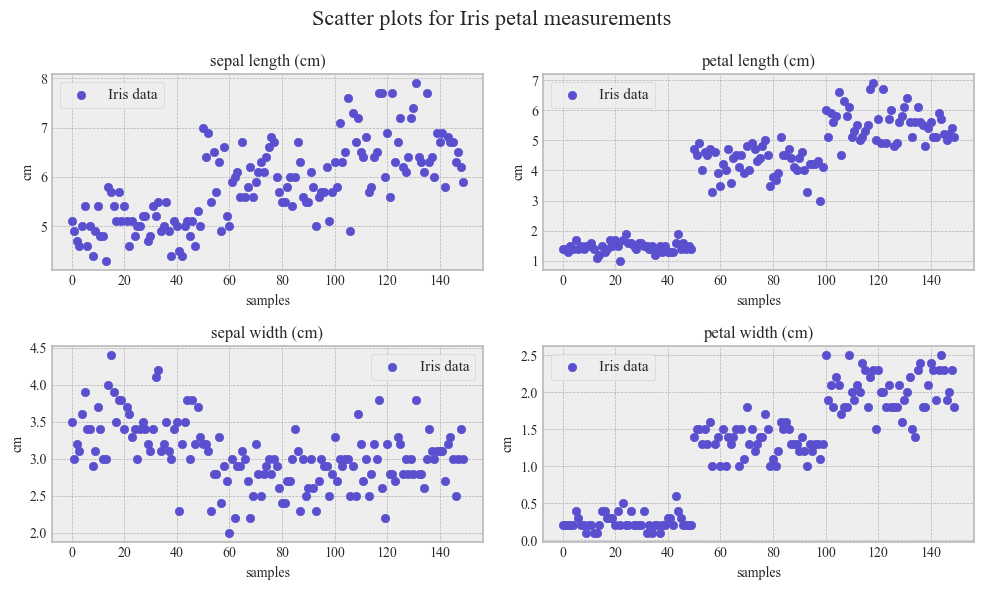

In [246]:
# Scatter plot for iris petal measurements
#c=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
c=df.columns # get column names
#set up plot for 4 charts
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.suptitle('Scatter plots for Iris petal measurements', fontsize=16)
#set grid coordinates for looped subplots
rows=[0,1,0,1]
cols=[0,0,1,1]
#loop through numeric data and draw histogram + indicate mean
for i in range(4): # only the first 4 columns are numeric
    mean = df[c[i]].mean() #get mean 
    # generate subplots and place them on predefined coordinates
    axs[rows[i],cols[i]].scatter(df.index, df[c[i]],label="Iris data",color='#5a4fcf')
    axs[rows[i],cols[i]].set_title(c[i], fontsize=12)
    axs[rows[i],cols[i]].set_xlabel("samples", fontsize=10)
    axs[rows[i],cols[i]].set_ylabel("cm", fontsize=10)
    axs[rows[i],cols[i]].legend(fontsize=11)

plt.tight_layout() #keep the text from overlapping
plt.show()

# ref: https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/
# ref creating multiple subplots: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# ref arranging multiple subplots: https://matplotlib.org/stable/users/explain/axes/arranging_axes.html

The scatter plots of *petal lenght (cm)* and *petal width (cm)* reveal that the there are 3 distinct groups of measurements indicating a possible separation between the species. By using the scatterplot from the seaborn library, we can add a **hue** parameter to group and colour-code the data by a categorical variable, in this case the 'species' variable.

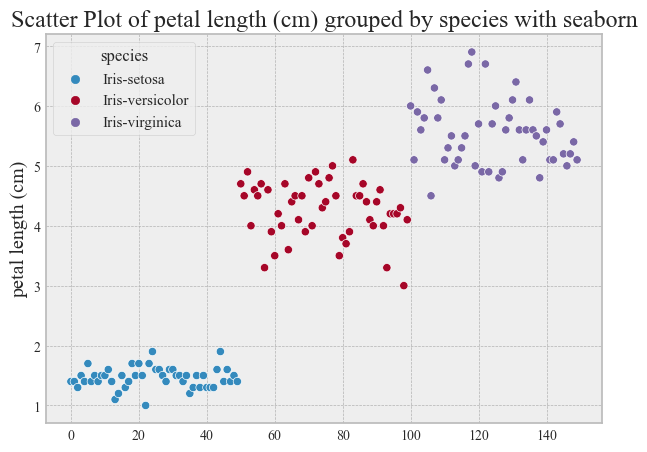

In [234]:
# seaborn scatterplot for petal length
sns.scatterplot(x=df.index,y=df['petal length (cm)'],hue=df['species'])
plt.title("Scatter Plot of petal length (cm) grouped by species with seaborn")
plt.show()


The new scatter plot, using the seaborn library, reveals, that there are distinct petal lengths specific to Iris-setosa, while versicolor and virginica also have their typical petal lengths, although there is some overlay present at around the 5.0 cm mark.

##### 5.1.2 Histogram

A histogram is an approximate representation of the distribution of numerical data. It visualizes how often each different value in a set of data occurs. A histogram is the most commonly used graph to show frequency distributions of continuous data.<br>
Histograms are chosen for numeric data visualization because they reveal distribution shape, central tendency (Mean), spread (Standard deviation), outliers, and data range in a visual manner. <br>
By visualizing and analysing the data distribution in numeric variables of the dataset we can determine which random distribution model is the most suitable to model the data. <br> In the context of the iris dataset, histograms represent the distribution and variations of the samples for each measurement.

###### WHAT IS A HISTOGRAM? (ref: https://asq.org/quality-resources/histogram) <br> Histogram (ref:https://en.wikipedia.org/wiki/Histogram)

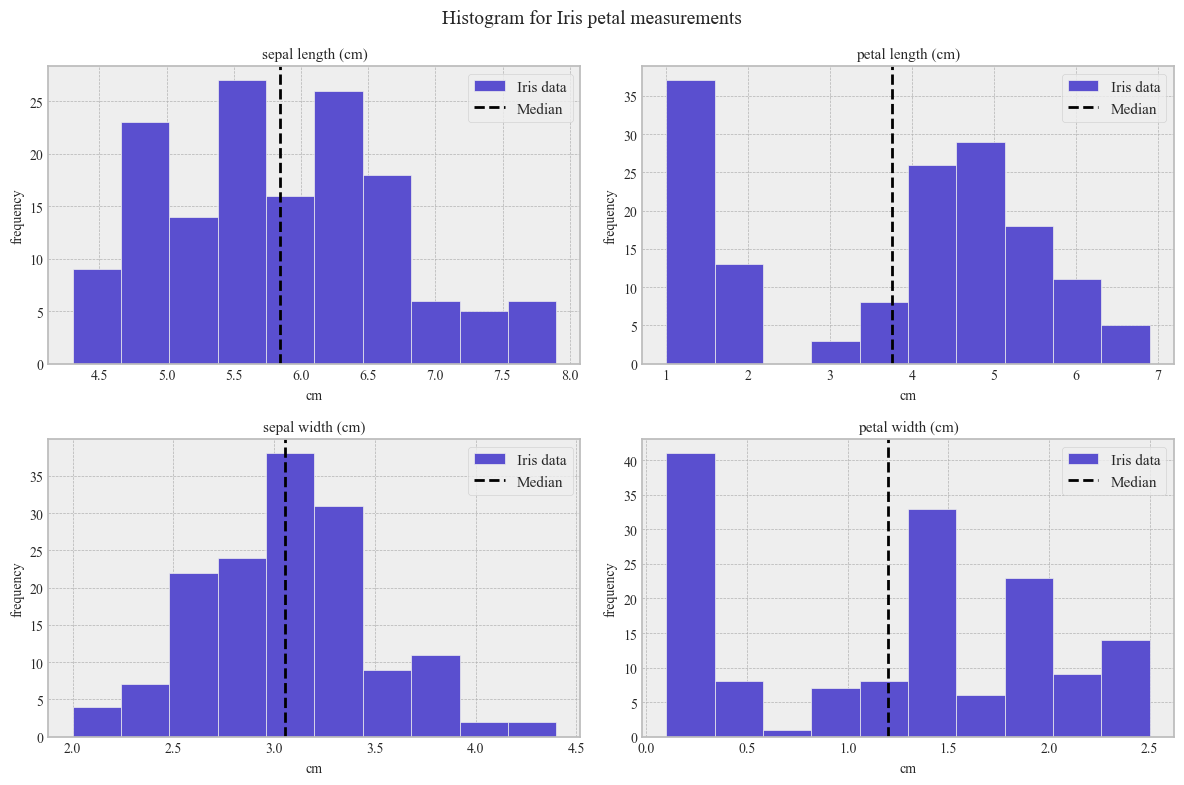

In [248]:
# Histogram for iris petal measurements
c=df.columns # get column names
#set up plot for 4 charts
fig, axs = plt.subplots(2,2, figsize=(12,8))
fig.suptitle('Histogram for Iris petal measurements',fontsize=14)
#set grid coordinates for looped subplots
rows=[0,1,0,1]
cols=[0,0,1,1]
#loop through numeric data and draw histogram + indicate mean
for i in range(4): # first 4 (numeric) columns
    mean = df[c[i]].mean() #get mean 
    # generate subplots and place them on predefined coordinates
    axs[rows[i],cols[i]].hist(df[c[i]],bins=10,label="Iris data",color='#5a4fcf')
    axs[rows[i],cols[i]].set_title(c[i], fontsize=11)
    axs[rows[i],cols[i]].axvline(mean, color="black", ls="--", label="Median")
    axs[rows[i],cols[i]].set_xlabel("cm", fontsize=10)
    axs[rows[i],cols[i]].set_ylabel("frequency", fontsize=10)
    axs[rows[i],cols[i]].legend(fontsize=11)

plt.tight_layout() #keep the text from overlapping
plt.show()

# ref get mean: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
# ref matplotlib histograms: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# ref draw median: https://python-graph-gallery.com/basic-histogram-in-matplotlib/
# ref arranging multiple subplots: https://matplotlib.org/stable/users/explain/axes/arranging_axes.html


A histogram plots the distribution of a numeric variable’s values as a series of bars. Each bar typically covers a range of numeric values called a bin or class; a bar’s height indicates the frequency of data points with a value within the corresponding bin. Histograms are useful for showing the distribution or shape of the data in numeric variables. <br> 
The number of peaks and their position determines if the histogram is: "uniform", "symmetric", "unimodal", "bimodal" or "multimodal", "skewed left" or "right". These characteristics can help understand the patterns in the data and also helpful in selecting a random distribution model to model the data.
###### <img src="https://chartio.com/assets/db1384/tutorials/charts/histograms/8f583a5fe6872609b95c00a4c75a30b9bf3f0ee012ca6590563e3510ffd14841/histogram-example-2.png" alt="Alt text" width="500" height="250"/> <br>*Distribution shapes. - Image source: chartio.com*

In the case of the Iris data, 'sepal length' and 'petal width' could be considered multimodal, 'petal length' a bimodal and 'sepal width' a more or less symmetric, unimodal histogram.<br> The previously rendered scatter plots already indicated that petal length and petal width may have a species specific ranges. Sepal length however did not show any clustering of data. <br> However, Seaborn's histogram can facilitate grouping by categorical data. It may be interesting to see if sepal length show species specific ranges as well.

###### A Complete Guide to Histograms (ref:https://chartio.com/learn/charts/histogram-complete-guide/) <br> Histogram (ref:https://en.wikipedia.org/wiki/Histogram)

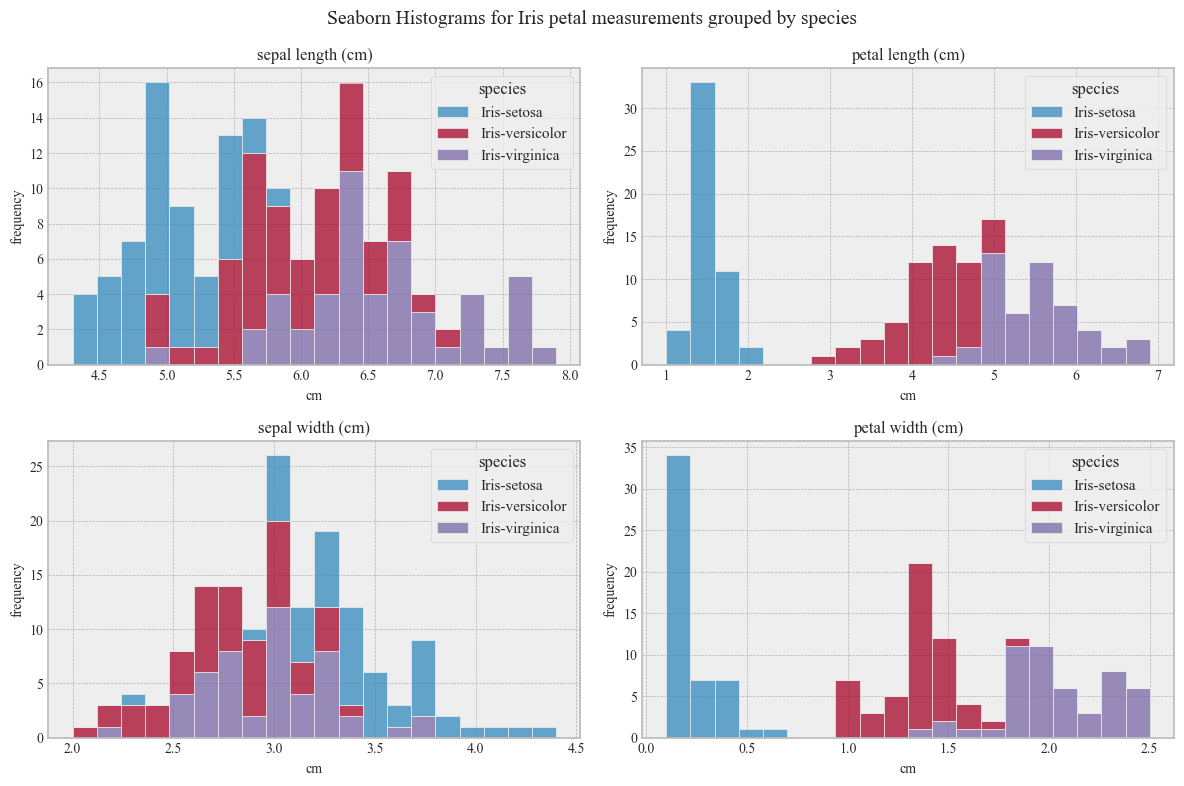

In [262]:
# Seaborn Histograms for iris petal measurements grouped by species 
c=df.columns # get column names
#set up plot for 4 charts
fig, axs = plt.subplots(2,2, figsize=(12,8))
fig.suptitle('Seaborn Histograms for Iris petal measurements grouped by species',fontsize=14)
#set grid coordinates for looped subplots
rows=[0,1,0,1]
cols=[0,0,1,1]
#loop through numeric data and draw histogram + indicate mean
for i in range(4): # first 4 (numeric) columns
    # generate subplots and place them on predefined coordinates
    sns.histplot(ax=axs[rows[i],cols[i]],data=df, x=c[i], hue='species', multiple='stack',bins=20, legend=True)
    axs[rows[i],cols[i]].set_title(c[i], fontsize=12)
    axs[rows[i],cols[i]].set_xlabel("cm", fontsize=10)
    axs[rows[i],cols[i]].set_ylabel("frequency", fontsize=10)

plt.tight_layout() #keep the text from overlapping
plt.show()

#seaborn subplotting (ref: https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8)
# seaborn stacked histogram (ref: https://seaborn.pydata.org/tutorial/distributions.html)

Seaborn's grouped histograms are more informative, revealing that while Iris-setosa has distinct petals, while virginica petals are the largest but its smaller petal could be mistaken for bigger versicolor ones. Meanwhile sepal measurements do not offer much clarity other than the shortest ones are likely belong to setosa while the longest ones are probably virginica flowers.

##### 5.1.2 Box plot 

Box plots are effective tools for visualizing the distribution of numeric data. They offer a high-level overview of essential statistical characteristics, a good visual representation on the central tendencies within the data, based on five attributes; minimum, first quartile, median, third quartile and maximum. The box represents the central 50% of the data with a line representing the median value, while the whiskers cover the remaining range of the data. Outliers are plotted outside the whiskers range as individual points. <br>

Anatomy:
+ Box: The box represents the interquartile range, containing the middle 50% of the data.
+ Median: The middle value represented with a line, dividing the data into two equal halves
+ Whiskers: Lines extending to the minimum and maximum values within a certain range.
+ Outliers: Individual data points beyond the whiskers depicted by dots or circles. The length of the whiskers is often determined by a multiplier (default is 1.5 times the IQR). Data points beyond the whiskers may be considered as potential outliers.
###### <img src="https://api.www.labxchange.org/api/v1/xblocks/lb:LabXchange:d8863c77:html:1/storage/211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png" alt="Alt text" width="500" height="250"/> <br>*The anatomy of a boxplot. - Image source: www.labxchange.org*

###### Understanding Boxplots (ref: https://builtin.com/data-science/boxplot) <br> A Complete Guide to Box Plots (Ref: ˙ref: https://chartio.com/learn/charts/box-plot-complete-guide/) <br> Matplotlib Boxplot (ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

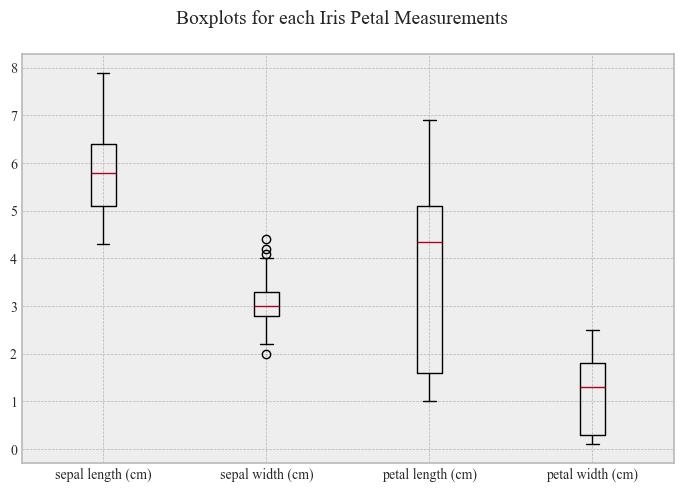

In [250]:
# Box plot for iris petal measurements
c = df.columns  # get column names
fig, ax = plt.subplots(figsize=(7, 5))
fig.suptitle('Boxplots for each Iris Petal Measurements', fontsize=14)
# Loop through numeric data and draw boxplot + indicate mean
for i in range(4):
    ax.boxplot(df[c[i]], positions=[i], labels=[c[i]])

plt.tight_layout()  # keep the text from overlapping
plt.show()

# ref: box plot: https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/
# ref: fit all plt box plots on one plot with separation (positions=[i]): https://stackoverflow.com/questions/35871627/matplotlib-boxplot-x-axis

The boxplots of the flower measurements do not expand on previous observations. Petal length showing the widest spread which makes it a good candidate for a grouped visualisation with seaborn.

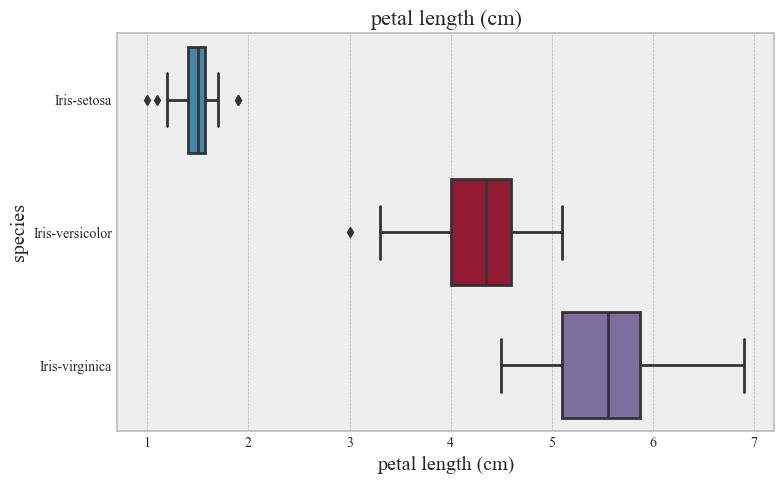

In [289]:
# box plot for 'bill_depth_mm' with categorical groups 'sex',further grouped colour & coded with 'species'

fig, ax = plt.subplots(figsize=(8,5))#set up plot
sns.boxplot(x=df['petal length (cm)'], y=df['species'])
ax.set_title('petal length (cm)', fontsize=16)
plt.tight_layout()
plt.show()

The box plot of the petal lengths grouped by 'species' once again confirmed the distinction of the setosa flowers from the others having the shortest petals under 2cm, while also revealed that the two bigger species have about 25% of their samples overlapping. This visualisation also suggests that a typical versicolor has a petal lenght of 4-4.5cm while most of the flowers with a petal longer than 5cm are likely to be Iris-virginica.

##### 5.1.3 Pairs plot

The Pairplot aids the analysis of pairwise relationships between variables within a dataset, offering a visual summary of a large amount of data within a single figure. This is particularly helpful during the initial exploration of a dataset.
<br>
It is a matrix of multiple plots where each plot shows the relationship between a pair of variables. A pairs plot shows both distributions of a single variable and relationships between two variables. This Seaborn visualisation creates a grid of scatter plots and histograms or Kernel Density Estimations (KDE), if the function's hue parameter is defined, visualizing the pairwise relationships in a dataset. The comparison is made easier by having all pairs of measurements plotted side by side using subplots. Where the same measurement paired, a histogram or KDE is drawn. <br>
A KDE, instead of using bins to count observations like histograms, smooths the observations with a Gaussian kernel, producing a continuous density estimate, approximating the underlying probability density function. 

###### Seaborn Pairplot: Enhance Your Data Understanding with a Single Plot (ref: https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22) <br> seaborn.pairplot (ref: https://seaborn.pydata.org/generated/seaborn.pairplot.html) <br> Pair plots in R (ref: https://medium.com/@ai.mlresearcher/pair-plots-in-r-140db6584ba#:~:text=To%20visualize%20relationships%20among%20variables,and%20relationships%20between%20two%20variables.) <br> Visualizing Data with Pairs Plots in Python (ref: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)

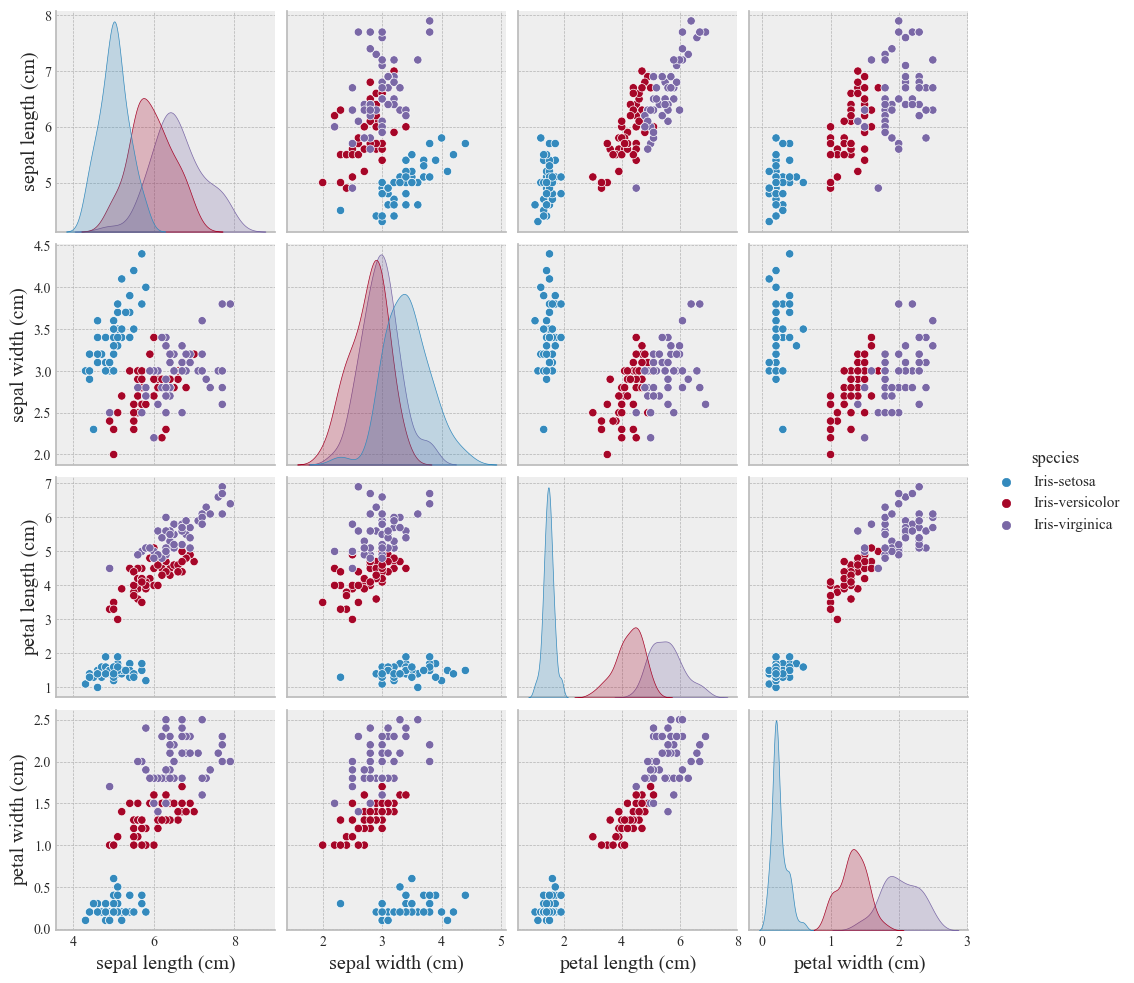

In [290]:
# render pairs plot for Iris flowers
sns.pairplot(df, hue="species")
plt.show()

The resulting data visualisation more or less summarizes the previously described observations. Furthermore, there is a clear positive correlation between petal length and petal width accross the species while there is a general but weaker positive correlation between the other measurements especially in the two larger species. Iris-stenosa, perhaps because its flowers are quite small, do not show this trend that clearly.

#### 5.2 Categorical data

The 'species' variable in the Iris dataset is a categorical variable. As with categorical variables there is no hierarchical order, and because they represent qualitative values, these variables cannot be represented on a numeric scale. Categorical variables are commonly visualized with frequency tables, bar charts and pie charts. For 'species' a bar chart and a pie chart will be used for visualisation.

###### Bar Chart (ref: https://en.wikipedia.org/wiki/Bar_chart) <br> 8 easy plotting categorical variables with seaborn for Pandas Dataframe (ref: https://medium.com/@DemetrioCN/8-easy-plotting-categorical-variables-with-seaborn-for-pandas-dataframe-15bcdc10e99a) <br> Bar Chart (ref: https://www.jmp.com/en_nl/statistics-knowledge-portal/exploratory-data-analysis/bar-chart.html#:~:text=Bar%20charts%20make%20sense%20for,responses%20have%20a%20defined%20order.)<br> Types of Data Visualizations for Categorical Dataset (ref: https://vitalflux.com/categorical-data-visualization-concepts-examples/) 

##### 5.2.1 Bar chart
A bar chart plots numeric values for levels of a categorical feature as bars. Levels are plotted on one chart axis, and values are plotted on the other axis. Each categorical value claims one bar, and the length of each bar corresponds to the bar’s value. Bars are plotted on a common baseline to allow for easy comparison of values.

###### ref: A Complete Guide to Bar Charts: https://chartio.com/learn/charts/bar-chart-complete-guide/

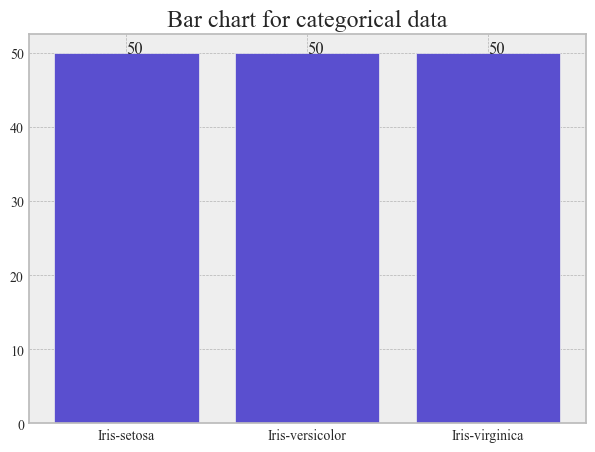

In [240]:
freq = df['species'].value_counts()
species = freq.index
plt.bar(species,freq, color='#5a4fcf')
plt.title('Bar chart for categorical data')
for i, f in enumerate(freq):
    plt.text(i, f,  str(f))
plt.show()

# ref get column labels https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html


##### 5.2.1 Pie chart
A pie chart (or a circle chart) is a circular statistical graphic which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area) is proportional to the quantity it represents. 

###### ref: Pie Chart: https://en.wikipedia.org/wiki/Pie_chart

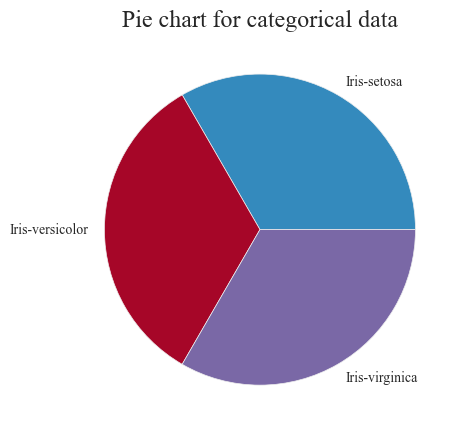

In [241]:
# draw pie chart for categorical variable 'species'
freq = df['species'].value_counts()
species = freq.index
plt.pie(freq,labels=species)
plt.title('Pie chart for categorical data')
plt.show()
#ref pie charts: https://www.w3schools.com/python/matplotlib_pie_charts.asp